# Tree Based Models

In [64]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Import model selection methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Import classification metrics
from sklearn.metrics import classification_report,  confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score

# Import regression metrics
from sklearn.metrics import mean_squared_error as MSE

# Import classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

# Import regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Import ensembles
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor

## Classification and Regression Trees

In this section, I'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor and its mean number of concave points.

### Classification

In [18]:
df = pd.read_csv('datasets/tree/wbc.csv')
df.drop('Unnamed: 32', axis=1, inplace=True)

In [19]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# Change the labels to 1 and 0's
label_dict = {'M':1, "B":0}
df['diagnosis'] = df.diagnosis.map(label_dict)

In [6]:
# Create features and target
X = df[['radius_mean', 'concave points_mean']]
y = df.diagnosis

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)

X.shape

(569, 2)

In [7]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


In [8]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


Using two features, your tree was able to achieve an accuracy of 89%.

### Logistic Regression vs Classification Tree

In [35]:
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


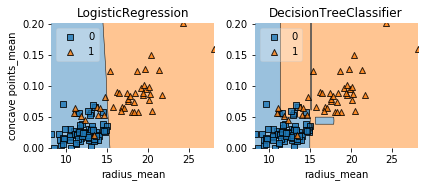

In [33]:
# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

The decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

### Information Gain(IG), Entropy, Gini

Using a decision algorithm, we start at the tree root and split the data on the feature that results in the largest information gain (IG).

Entropy is a way to measure impurity. Gini index is a criterion to minimize the probability of misclassification.

In [48]:
# Create features and target
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)

X.shape

(569, 31)

In [49]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

In [50]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

In [51]:
# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9385964912280702
Accuracy achieved by using the gini index:  0.9298245614035088


### Regression

In [52]:
df = pd.read_csv('datasets/tree/auto.csv')

In [53]:
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


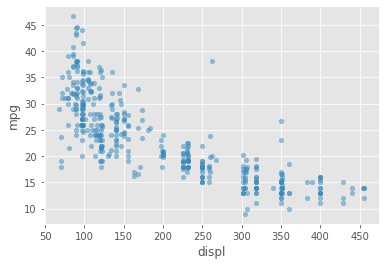

In [57]:
plt.style.use('ggplot')
df.plot.scatter('displ', 'mpg', alpha=.5)

In [78]:
# Create features and target
X = pd.get_dummies(df.drop('mpg', axis=1))
y = df.mpg

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

X.shape

(392, 8)

In [87]:
# Instantiate dt
dt_reg = DecisionTreeRegressor(max_depth=8, min_samples_leaf=.13,
                           random_state=1)

# Fit dt to the training set
dt_reg.fit(X_train, y_train)

# Compute y_pred
y_pred = dt_reg.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**.5

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.44


In [88]:
lr = LinearRegression()

# Fit lr to the training set
lr.fit(X_train, y_train)

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**.5

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

Linear Regression test set RMSE: 3.82


## Bias-Variance Tradeoff

In [67]:
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [73]:
# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=.26, random_state=1)

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(.5)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


> For the most common use cases, you can designate a scorer object with the scoring parameter. All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

In [75]:
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(.5)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


## Ensemble Methods

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

In **averaging methods**, the driving principle is to build several estimators _independently_ and then to average their predictions. On average, the combined estimator is **usually better** than any of the single base estimator **because its variance is reduced**.

_Examples: Bagging methods, Forests of randomized trees, …_

By contrast, in **boosting methods**, base estimators are built _sequentially_ and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

_Examples: AdaBoost, Gradient Tree Boosting, …_ [source](https://scikit-learn.org/stable/modules/ensemble.html)

In [2]:
df = pd.read_csv('datasets/tree/indian_liver_patient_preprocessed.csv', index_col=0)

In [3]:
df.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [4]:
# Create features and target
X = df.drop('Liver_disease', axis=1)
y = df['Liver_disease']

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

X.shape

(579, 10)

### Voting Classifier

In [5]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), 
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

In [6]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.764
K Nearest Neighbours : 0.701
Classification Tree : 0.730


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression achieved the highest accuracy.

In [7]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred) 
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.770


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The voting classifier achieves a test set accuracy of 77%. This value is greater than that achieved by LogisticRegression.

In [23]:
# Create features and target
X = df[['radius_mean', 'concave points_mean']]
y = df.diagnosis

X.shape

(569, 2)

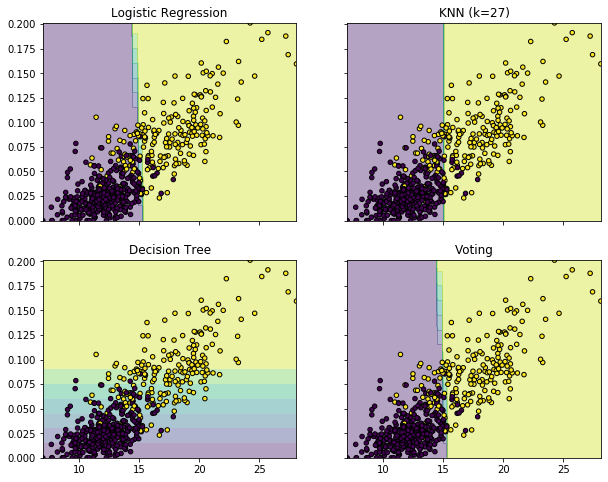

In [37]:
lr.fit(X, y)
knn.fit(X, y)
dt.fit(X, y)
vc.fit(X, y)

from itertools import product

# Plotting decision regions
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [lr, knn, dt, vc],
                        ['Logistic Regression', 'KNN (k=27)',
                         'Decision Tree', 'Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
    axarr[idx].set_ylim(X.values[:,1].min(), X.values[:,1].max())
    axarr[idx].set_xlim(X.values[:,0].min(), X.values[:,0].max())

plt.show()

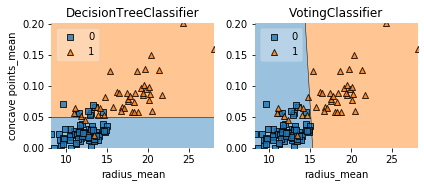

In [40]:
plot_labeled_decision_regions(X_test, y_test, [dt,vc])

## Bagging and Random Forests

### Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. [source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

_Base Estimator_ in bagging can be any estimator such as Decision Tree, Logistic Regression or Neural Net.

In [3]:
df = pd.read_csv('datasets/tree/indian_liver_patient_preprocessed.csv', index_col=0)

In [6]:
# Create features and target
X = df.drop('Liver_disease', axis=1)
y = df['Liver_disease']

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

X.shape

(579, 10)

In [7]:
# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred_dt = dt.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy of dt: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.64


In [9]:
# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
                       
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.71


Bagging increased the accuracy by 7%.

#### Out of Bag (OOB) Evaluation

In [14]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.724, OOB accuracy: 0.687


### Random Forests

In [28]:
df = pd.read_csv('datasets/tree/bikes.csv')

In [29]:
df.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [30]:
df.cnt.value_counts()

6      19
5      16
7      15
8      15
9      13
       ..
203     1
386     1
671     1
200     1
941     1
Name: cnt, Length: 606, dtype: int64

In [31]:
# Create features and target
X = df.drop('cnt', axis=1)
y = df['cnt']

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
c
X.shape

(1488, 12)

In [34]:
# Instantiate rf
dt = DecisionTreeRegressor(random_state=2)
            
# Fit rf to the training set    
dt.fit(X_train, y_train)

# Predict the test set labels
y_pred = dt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**.5

# Print rmse_test
print('Test set RMSE of dt: {:.2f}'.format(rmse_test))

Test set RMSE of dt: 68.81


In [35]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!

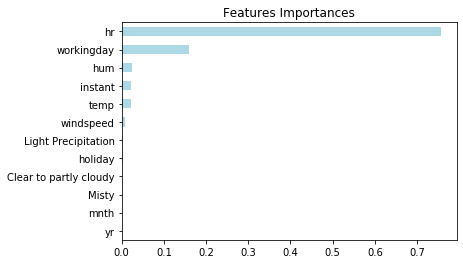

In [37]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightblue')
plt.title('Features Importances')
plt.show()

The importances of these two features add up to more than 0.9.

## Boosting

### AdaBoost (Adaptive Boosting)

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. [source](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)

In [40]:
df = pd.read_csv('datasets/tree/indian_liver_patient_preprocessed.csv', index_col=0)

In [41]:
# Create features and target
X = df.drop('Liver_disease', axis=1)
y = df['Liver_disease']

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

X.shape

(579, 10)

In [50]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=200, random_state=1)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.63


### Gradient Boosting (GB)

Gradient Tree Boosting or Gradient Boosted Regression Trees (GBRT) is a generalization of boosting to arbitrary differentiable loss functions. GBRT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems. Gradient Tree Boosting models are used in a variety of areas including Web search ranking and ecology.

The advantages of GBRT are:

- Natural handling of data of mixed type (= heterogeneous features)
- Predictive power
- Robustness to outliers in output space (via robust loss functions)

The disadvantages of GBRT are:

- Scalability, due to the sequential nature of boosting it can hardly be parallelized. [source](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)

In [52]:
df = pd.read_csv('datasets/tree/bikes.csv')

In [59]:
# Create features and target
X = df.drop('cnt', axis=1)
y = df['cnt']

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

X.shape

(1488, 12)

In [60]:
# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**.5

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 45.394


### Stochastic Gradient Boosting (SGB)

In [61]:
# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=.9,
            max_features=.75,
            n_estimators=200,                                
            random_state=2)

# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**.5

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 47.010


## Hyperparameter Tuning

### Tuning DT

In [62]:
df = pd.read_csv('datasets/tree/indian_liver_patient_preprocessed.csv', index_col=0)

In [63]:
# Create features and target
X = df.drop('Liver_disease', axis=1)
y = df['Liver_disease']

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

X.shape

(579, 10)

In [66]:
# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Define params_dt
params_dt = {
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]
}

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=3,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.716


### Tuning RF

In [70]:
df = pd.read_csv('datasets/tree/bikes.csv')

In [71]:
# Create features and target
X = df.drop('cnt', axis=1)
y = df['cnt']

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

X.shape

(1488, 12)

In [72]:
# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators': [100, 350, 500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30]
}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**.5

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   14.7s finished


Test RMSE of best model: 50.786


## Comparison

### RF vs GB


If you carefully tune parameters, gradient boosting can result in better performance than random forests. However, gradient boosting may not be a good choice if you have a lot of noise, as it can result in overfitting. They also tend to be harder to tune than random forests.
Random forests and gradient boosting each excel in different areas. Random forests perform well for multi-class object detection and bioinformatics, which tends to have a lot of statistical noise. Gradient Boosting performs well when you have unbalanced data such as in real time risk assessment. [source](https://www.datasciencecentral.com/profiles/blogs/decision-tree-vs-random-forest-vs-boosted-trees-explained)